In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

datos = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")

In [26]:
datos['iNumDia'] = datos['dtDia'].dt.day
#datoslimpios = datos.drop(columns=['dtDia', 'iCodMes', 'iCodDiaUniversal', 'iCodHora', 'vchDesCondCielo', 'vchDesDirViento'])
datos['Fecha'] = pd.to_datetime(dict(year=datos.iCodAno, month=datos.iNumMes, day=datos.iNumDia, hour=datos.iHoraUniversal))

In [27]:
def plotting(title, data, x, y, x_label, y_label):
    """General function to plot"""
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y:y_label})

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=title, width=650,
                      title_x=0.5, height=400)
    fig.show()

In [28]:
plotting(title='Energía', data=datos[:240], x='Fecha', y='fltSuma', x_label='Fecha', y_label='Generación')

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [29]:
datos['fltSuma_Diff'] = datos['fltSuma'].diff(periods=24)

plotting(title='Energía', data=datos, x='Fecha', y='fltSuma_Diff', x_label='Fecha', y_label='Generación')

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [30]:
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

adf_test(datos['fltSuma_Diff'][24:])

ADF Statistic:  -25.571985930604
P-Value:  0.0
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


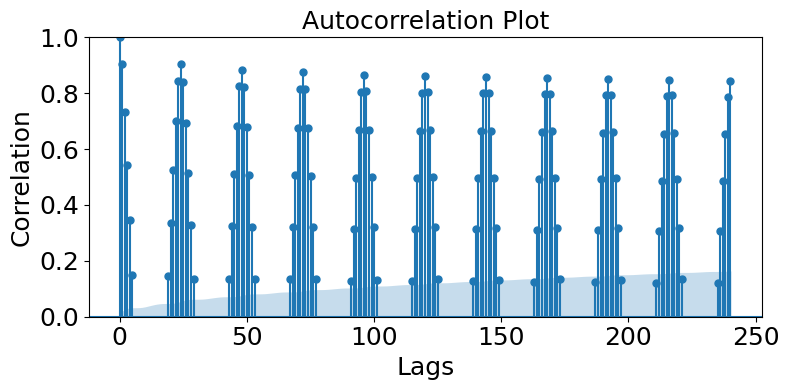

In [36]:
plt.rc("figure", figsize=(8,4))
plot_acf(datos['fltSuma'], lags=240)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=18)
plt.tight_layout()
plt.show()